In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import null_space
import scipy.linalg
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.pca import PCA
import pandas as pd
pd.options.display.max_columns = None
matplotlib.interactive(False)

In [176]:
THEME1_LIST = ['POV','UNEMP','PCI','NOHSDP']
THEME2_LIST = ['AGE65','AGE17','DISABL','SNGPNT']
THEME3_LIST = ['MINRTY','LIMENG']
THEME4_LIST = ['MUNIT','MOBILE','CROWD','NOVEH','GROUPQ']

def correlation_plot(dataset):
    pca = PCA(dataset, standardize=True, method='eig' )
    normalized_dataset = pca.transformed_data
    correlation_df = pd.DataFrame(
      data=np.cov(
        normalized_dataset, bias=True, rowvar=False
      ), columns=dataset.columns
    )

    plt.subplots( figsize=(20,20) )
    sns.heatmap( correlation_df, cmap='Blues', linewidths=0.7,
      annot=True, fmt='.2f', yticklabels=dataset.columns )
    plt.show()

In [177]:
df.loc[:, df.columns.str.contains('EMP')]

E_UNEMP_2016_2014_DIF  E_UNEMP_2018_2016_DIF  E_UNEMP_2018_2014_DIF
0                      -67.0                   -6.0                    -73
1                       -3.0                   -9.0                    -12
2                      -25.0                  -28.0                    -53
3                     -125.0                  -61.0                   -186
4                       32.0                  -45.0                    -13
...                      ...                    ...                    ...
72826                    7.0                   11.0                     18
72827                  -47.0                  -48.0                    -95
72828                   11.0                  -14.0                     -3
72829                  -58.0                    9.0                    -49
72830                   55.0                  -16.0                     39

[72525 rows x 3 columns]

In [178]:
df = pd.read_csv('svi_main.csv')
len(df)

72831

# NORTH CAROLINA ONLY

In [234]:
df = df[df['ST_ABBR']=='NC']

# NORTH CAROLINA ONLY

In [235]:
df = df[(df['RPL_THEMES_2018_2014_DIF']>-1) & 
        (df['RPL_THEMES_2018_2014_DIF']<1)  &
        (df['RPL_THEMES_2018_2016_DIF']>-1) & 
        (df['RPL_THEMES_2018_2016_DIF']<1)  &
        (df['RPL_THEMES_2016_2014_DIF']>-1) & 
        (df['RPL_THEMES_2016_2014_DIF']<1) &
       (df['RPL_THEME1_2016_2014_DIF']>-1) & 
        (df['RPL_THEME1_2016_2014_DIF']<1) &
       (df['RPL_THEME2_2016_2014_DIF']>-1) & 
        (df['RPL_THEME2_2016_2014_DIF']<1)  &
       (df['RPL_THEME3_2016_2014_DIF']>-1) & 
        (df['RPL_THEME3_2016_2014_DIF']<1)  &
       (df['RPL_THEME4_2016_2014_DIF']>-1) & 
        (df['RPL_THEME4_2016_2014_DIF']<1)&
       (df['RPL_THEME1_2018_2014_DIF']>-1) & 
        (df['RPL_THEME1_2018_2014_DIF']<1) &
       (df['RPL_THEME2_2018_2014_DIF']>-1) & 
        (df['RPL_THEME2_2018_2014_DIF']<1)  &
       (df['RPL_THEME3_2018_2014_DIF']>-1) & 
        (df['RPL_THEME3_2018_2014_DIF']<1)  &
       (df['RPL_THEME4_2018_2014_DIF']>-1) & 
        (df['RPL_THEME4_2018_2014_DIF']<1)&
       (df['RPL_THEME1_2018_2016_DIF']>-1) & 
        (df['RPL_THEME1_2018_2016_DIF']<1) &
       (df['RPL_THEME2_2018_2016_DIF']>-1) & 
        (df['RPL_THEME2_2018_2016_DIF']<1)  &
       (df['RPL_THEME3_2018_2016_DIF']>-1) & 
        (df['RPL_THEME3_2018_2016_DIF']<1)  &
       (df['RPL_THEME4_2018_2016_DIF']>-1) & 
        (df['RPL_THEME4_2018_2016_DIF']<1) ]
len(df)

2181

In [236]:
df_year = df.loc[:, df.columns.str.contains('2018_2014')]

# US total

## Total change analysis

In [237]:
df_tot_change = df[['RPL_THEMES_2018_2016_DIF','RPL_THEMES_2016_2014_DIF']]

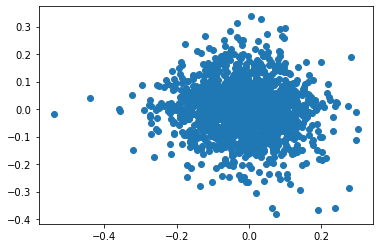

In [238]:
plt.scatter(df_tot_change['RPL_THEMES_2018_2016_DIF'],df_tot_change['RPL_THEMES_2016_2014_DIF'])

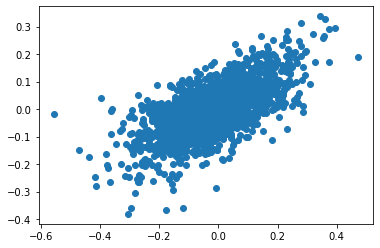

In [239]:
plt.scatter(df['RPL_THEMES_2018_2014_DIF'],df['RPL_THEMES_2016_2014_DIF'])

## Change by themes

In [240]:
df_themes_change = df_year.loc[:, df_year.columns.str.contains('RPL_THEME')]
dataset = df_themes_change

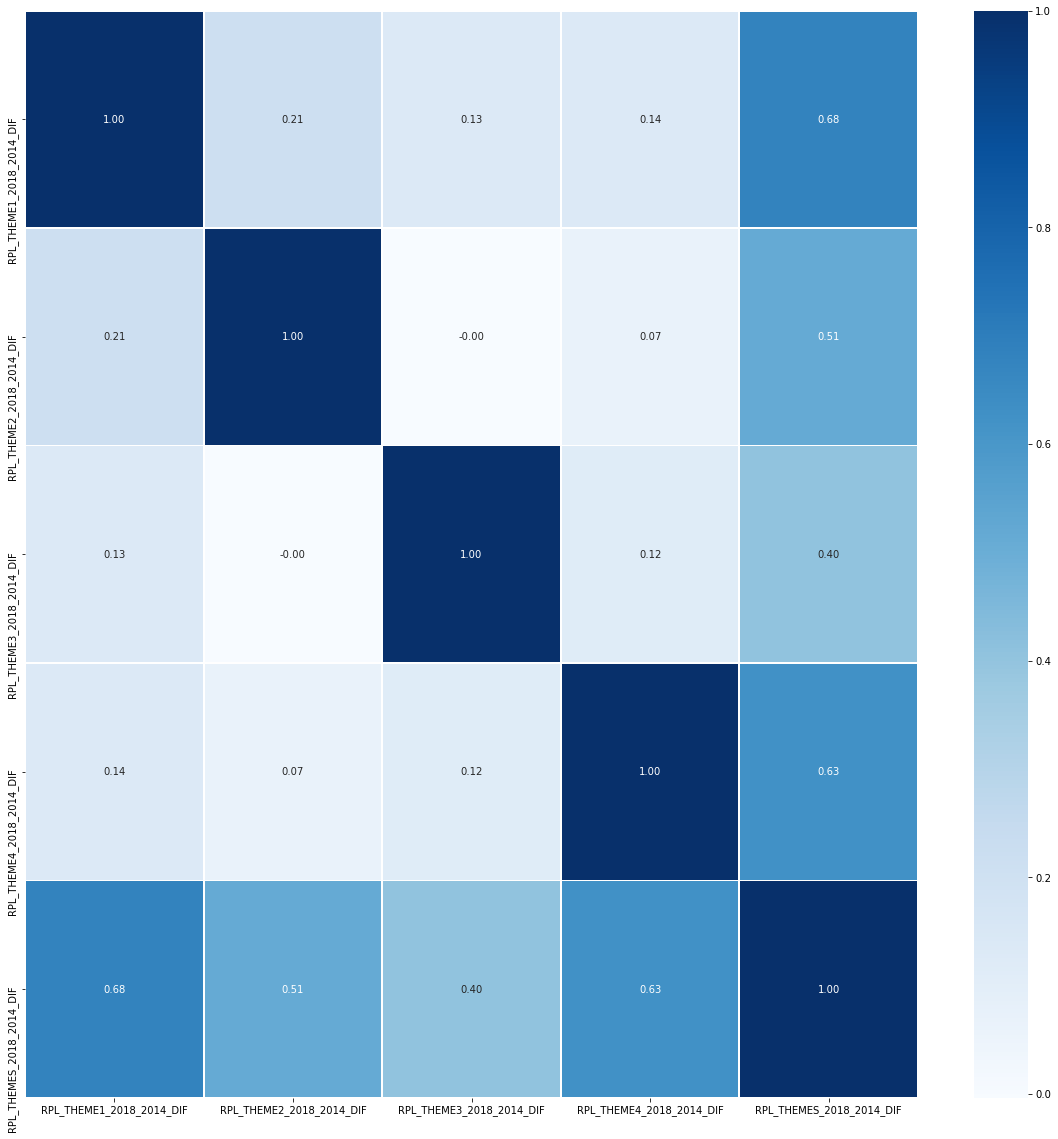

In [241]:
correlation_plot(dataset)

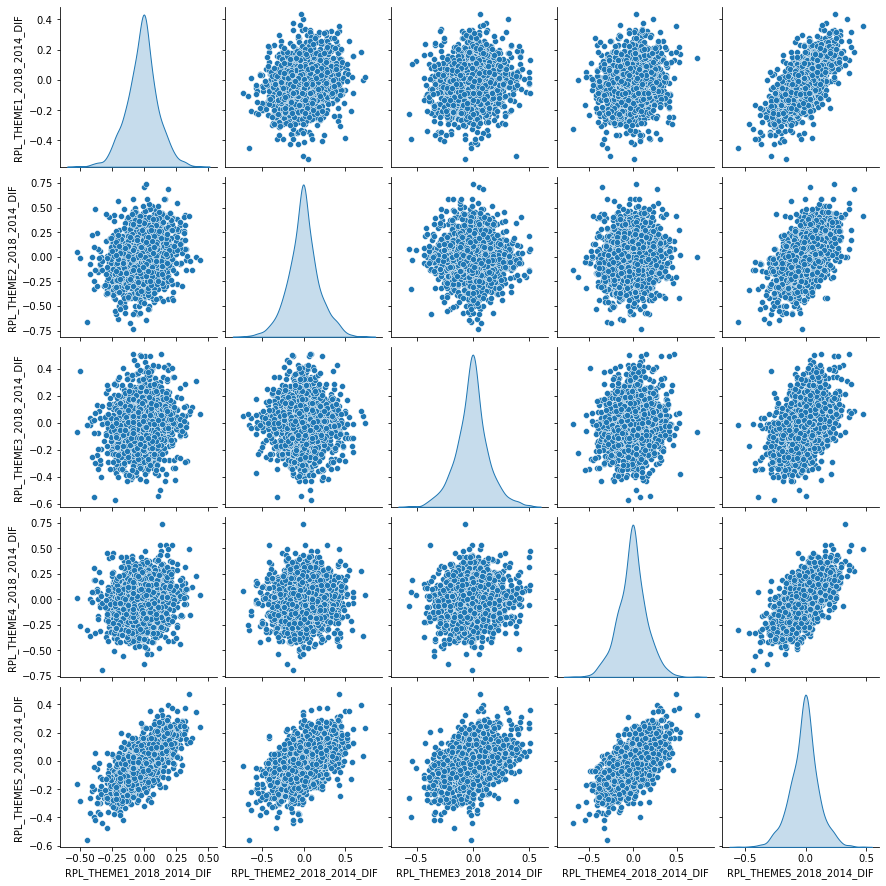

In [242]:
sns.pairplot(dataset, diag_kind='kde')

## Within each theme

### Theme 1

In [243]:
theme_1_df = df_year.loc[:, df_year.columns.str.contains('RPL_THEME1')]
for x in THEME1_LIST:
    df_to_append = df_year.loc[:, df_year.columns.str.contains('E_{}'.format(x))]
    theme_1_df = pd.concat([theme_1_df, df_to_append],
              axis=1)

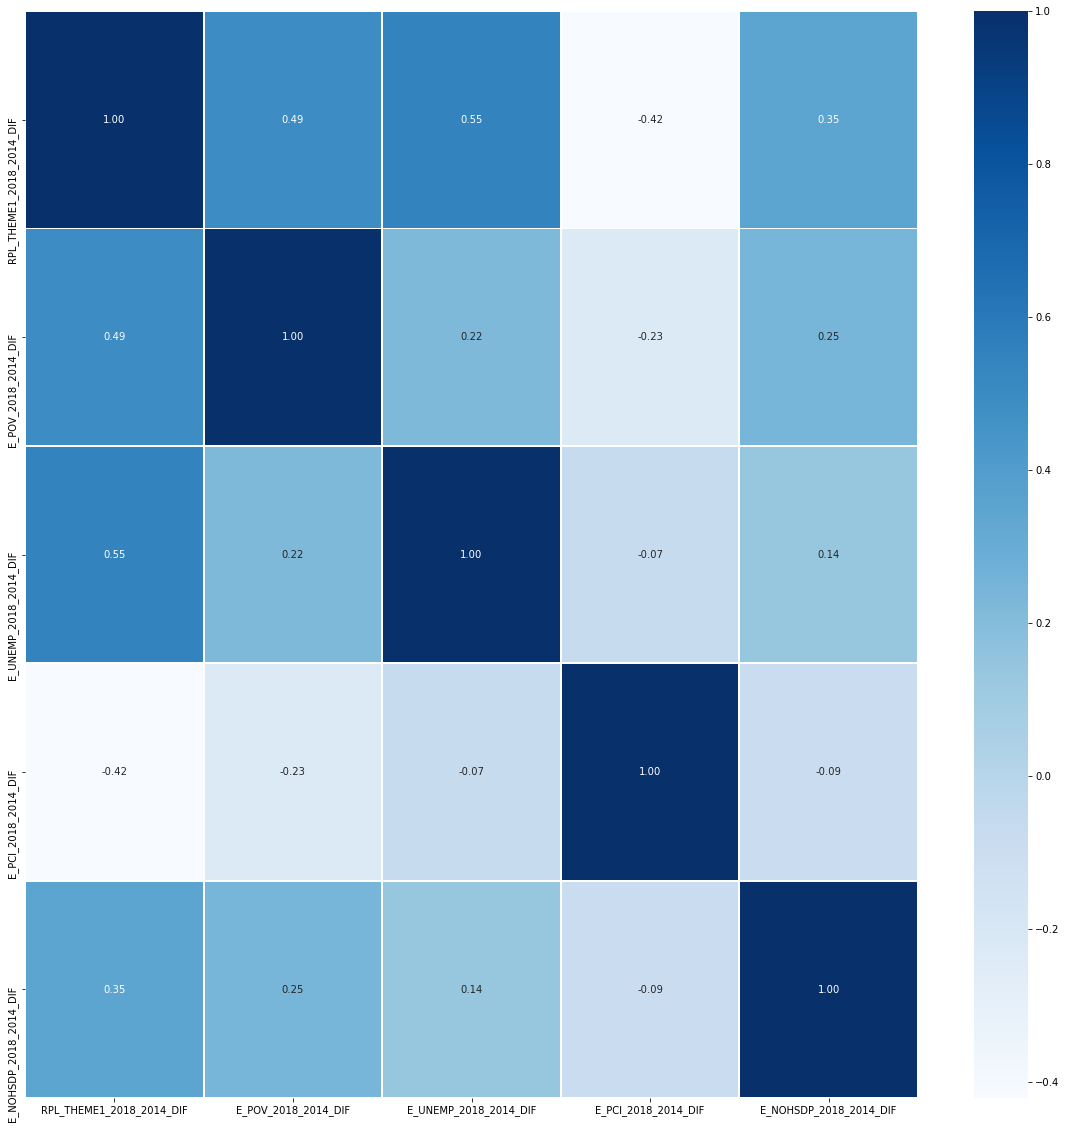

In [244]:
correlation_plot(theme_1_df)

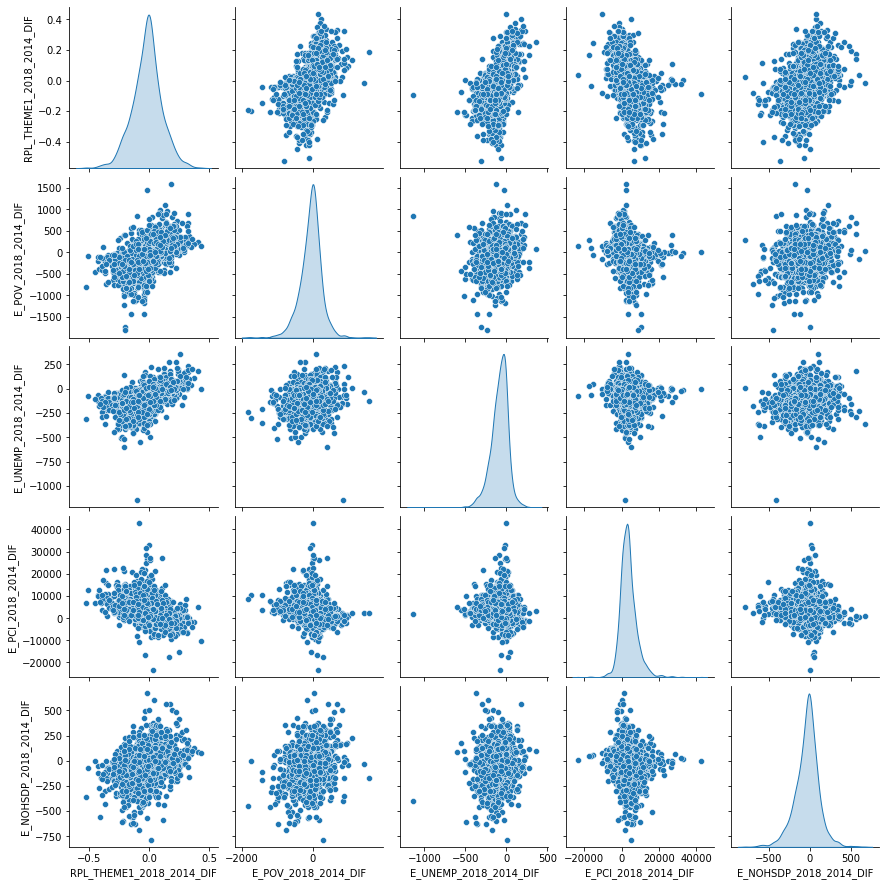

In [245]:
sns.pairplot(theme_1_df, diag_kind='kde')

### Theme 2

In [246]:
theme_2_df = df_year.loc[:, df_year.columns.str.contains('RPL_THEME2')]
for x in THEME2_LIST:
    df_to_append = df_year.loc[:, df_year.columns.str.contains('E_{}'.format(x))]
    theme_2_df = pd.concat([theme_2_df, df_to_append],
              axis=1)

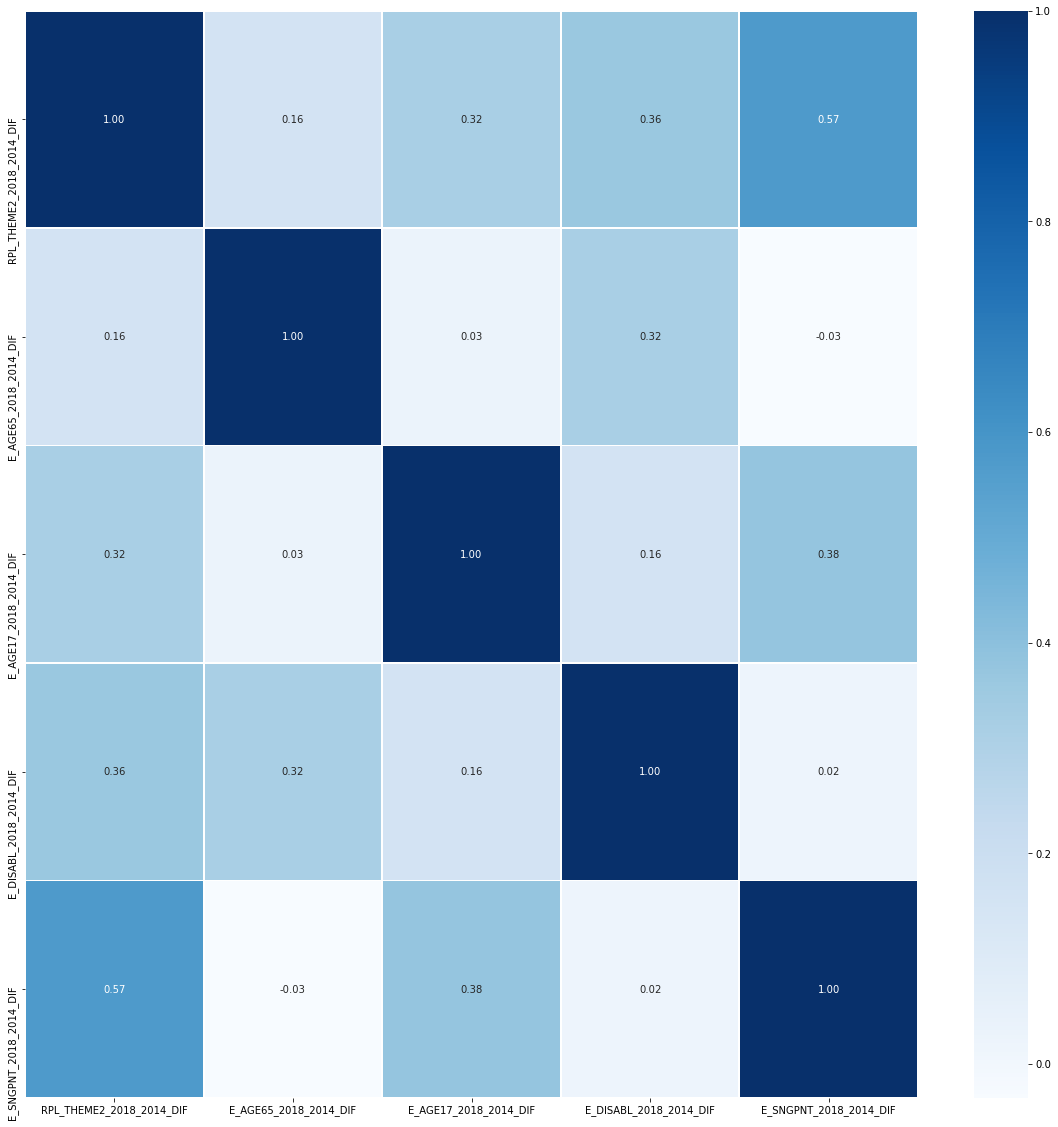

In [247]:
correlation_plot(theme_2_df)

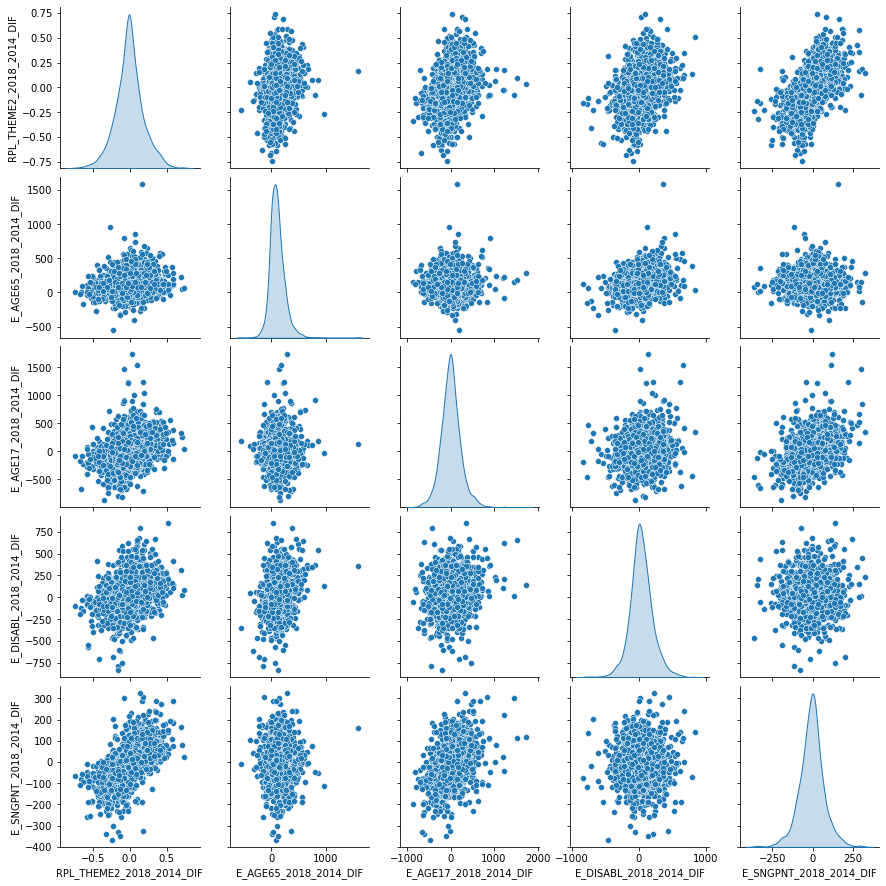

In [248]:
sns.pairplot(theme_2_df, diag_kind='kde')

### Theme 3

In [249]:
theme_3_df = df_year.loc[:, df_year.columns.str.contains('RPL_THEME3')]
for x in THEME3_LIST:
    df_to_append = df_year.loc[:, df_year.columns.str.contains('E_{}'.format(x))]
    theme_3_df = pd.concat([theme_3_df, df_to_append],
              axis=1)

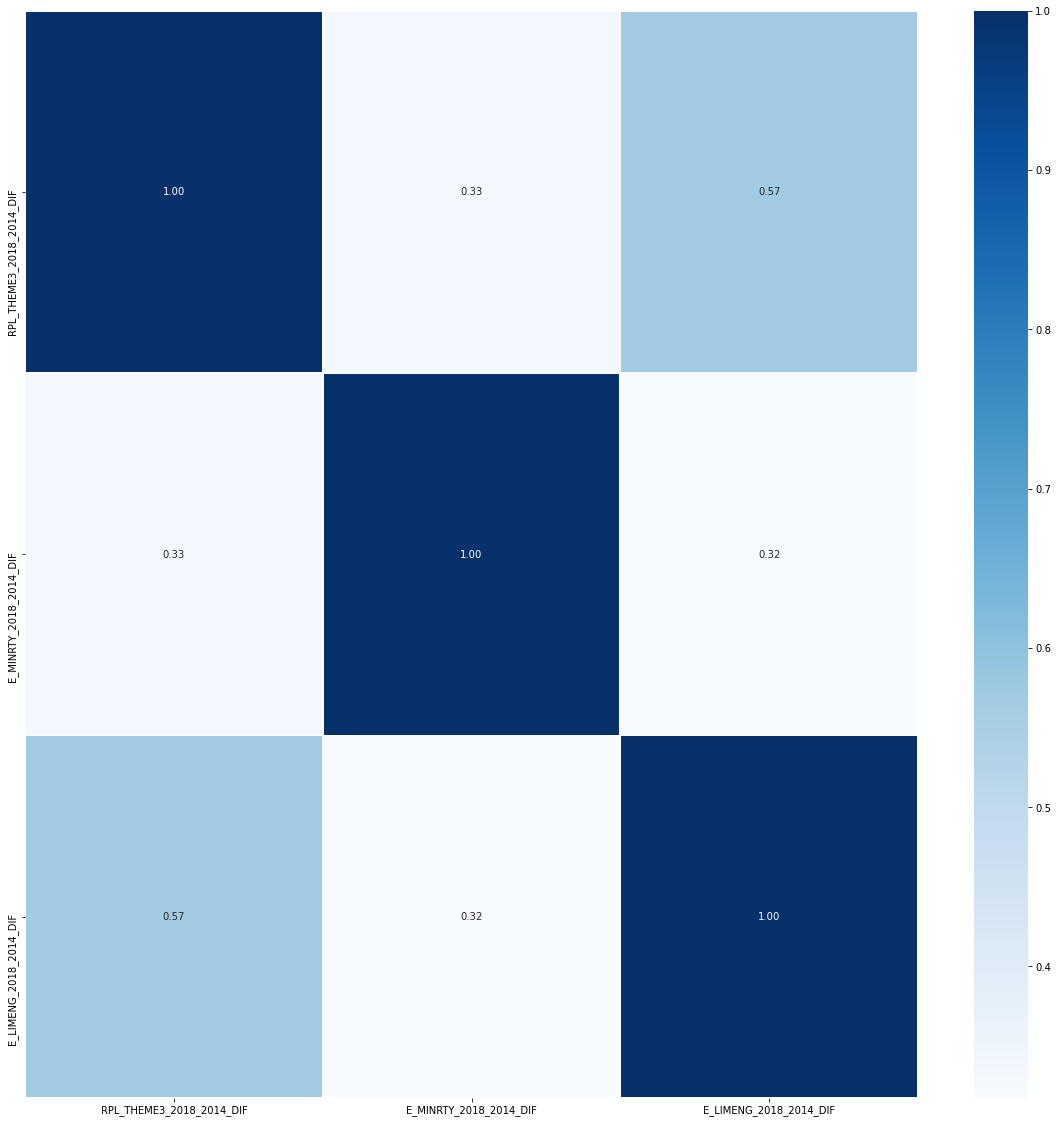

In [250]:
correlation_plot(theme_3_df)

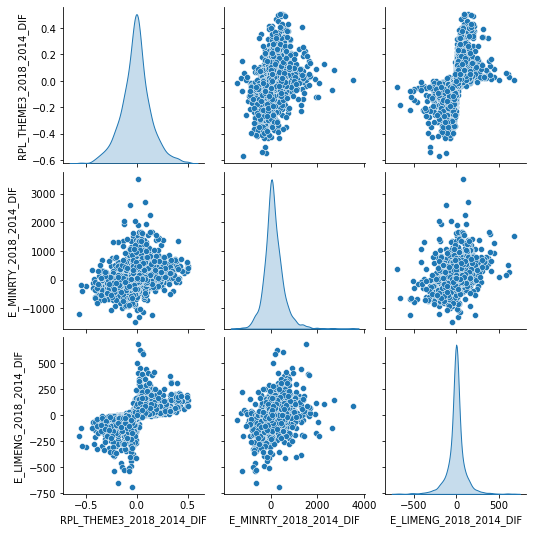

In [251]:
sns.pairplot(theme_3_df, diag_kind='kde')

### Theme 4

In [252]:
theme_4_df = df_year.loc[:, df_year.columns.str.contains('RPL_THEME4')]
for x in THEME4_LIST:
    df_to_append = df_year.loc[:, df_year.columns.str.contains('E_{}'.format(x))]
    theme_4_df = pd.concat([theme_4_df, df_to_append],
              axis=1)

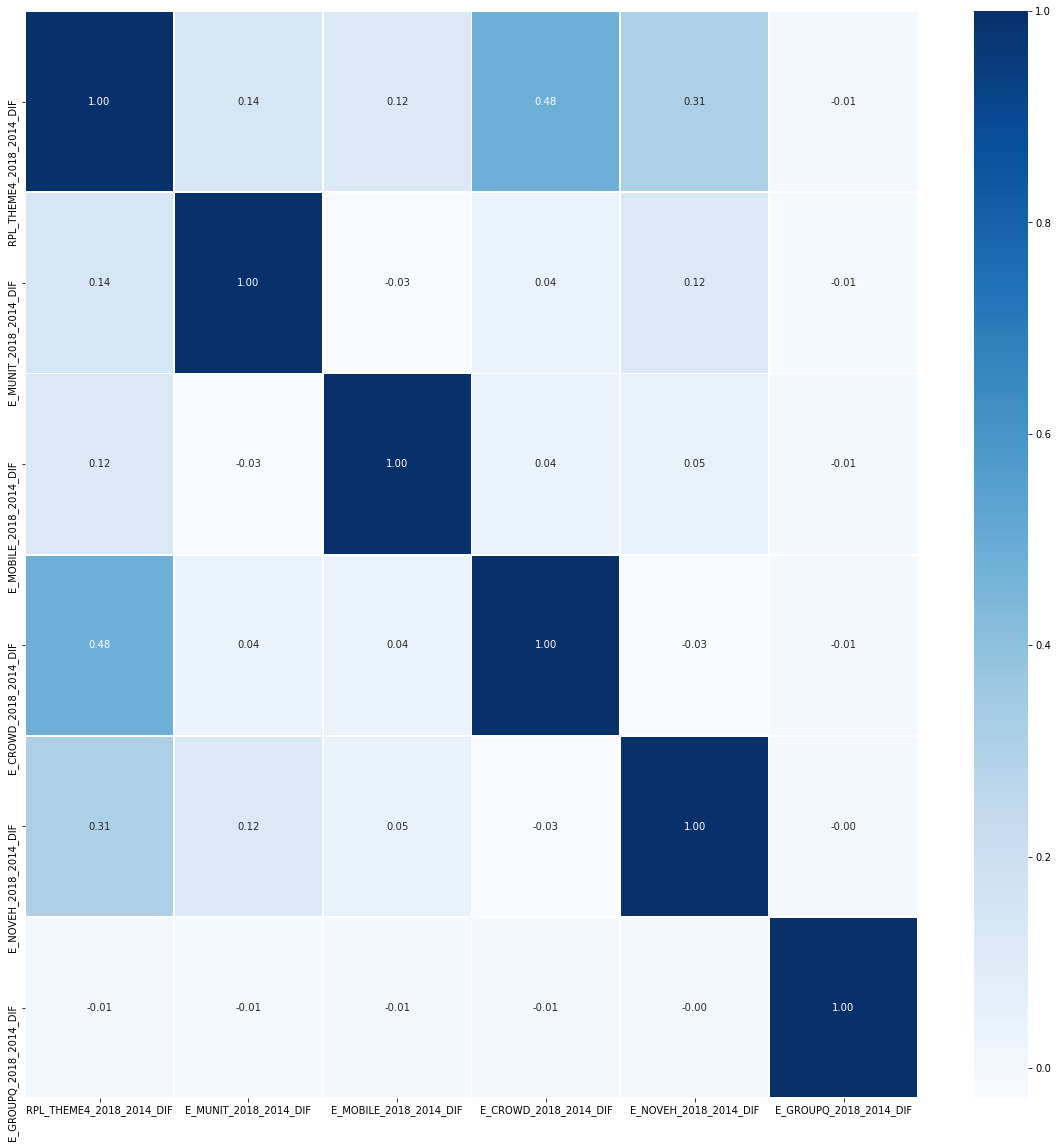

In [253]:
correlation_plot(theme_4_df)

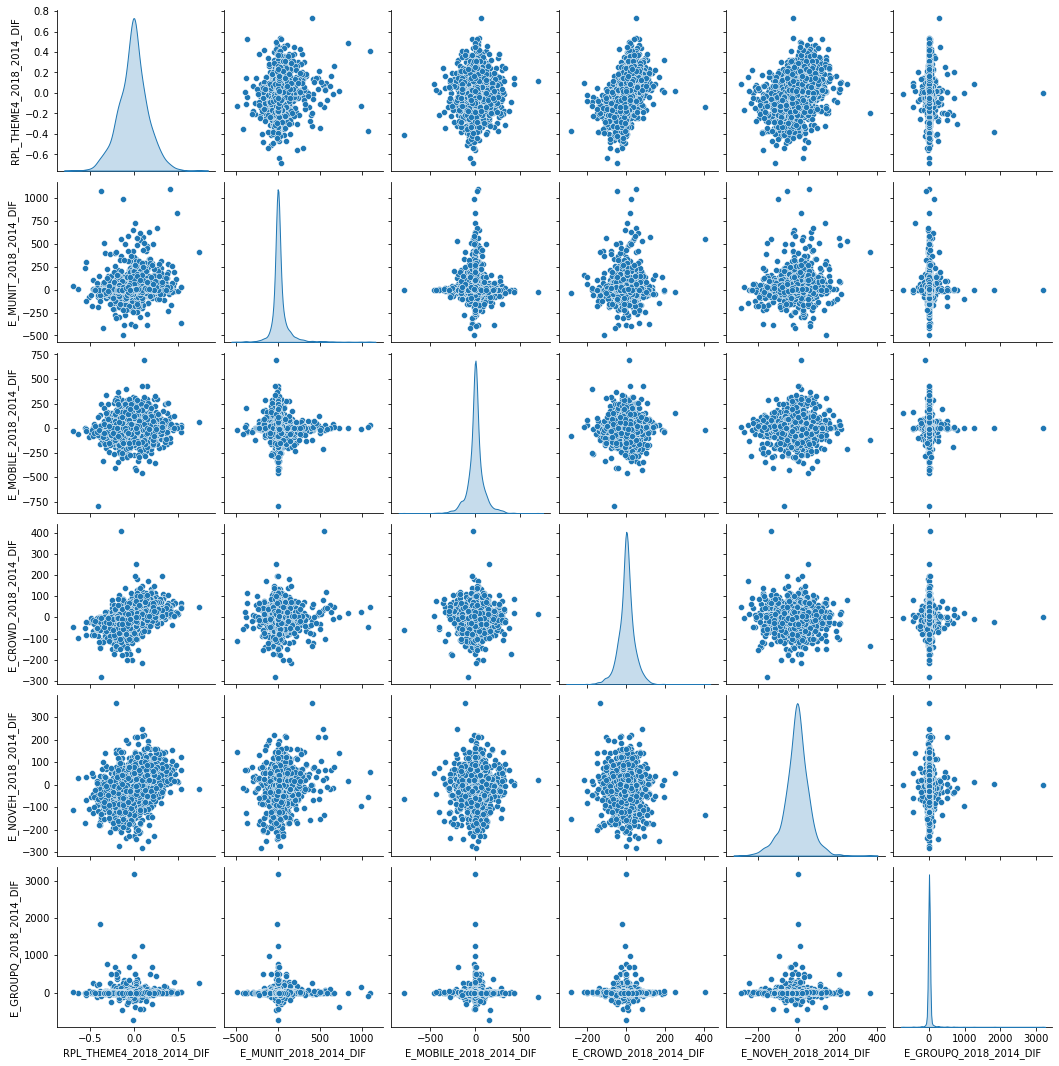

In [254]:
sns.pairplot(theme_4_df, diag_kind='kde')

## Change by variables

In [255]:
df_estimate_subset = df.loc[:, df.columns.str.contains('E_')]
dataset_by_var = df_estimate_subset.loc[:, df_estimate_subset.columns.str.contains('2018_2014')]

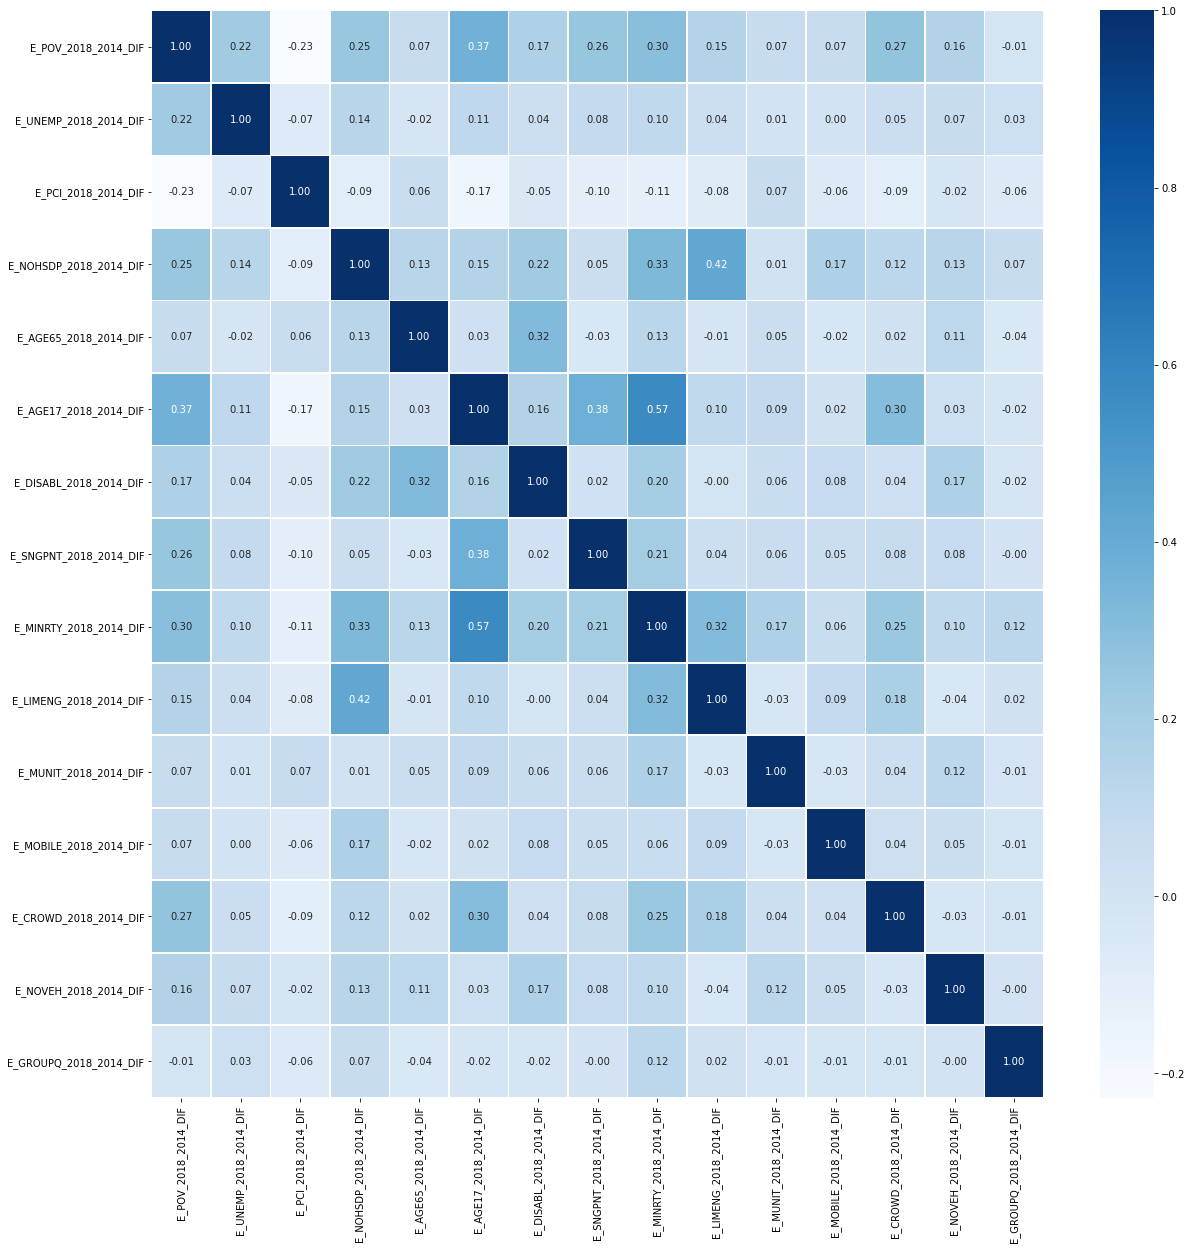

In [256]:
correlation_plot(dataset_by_var)

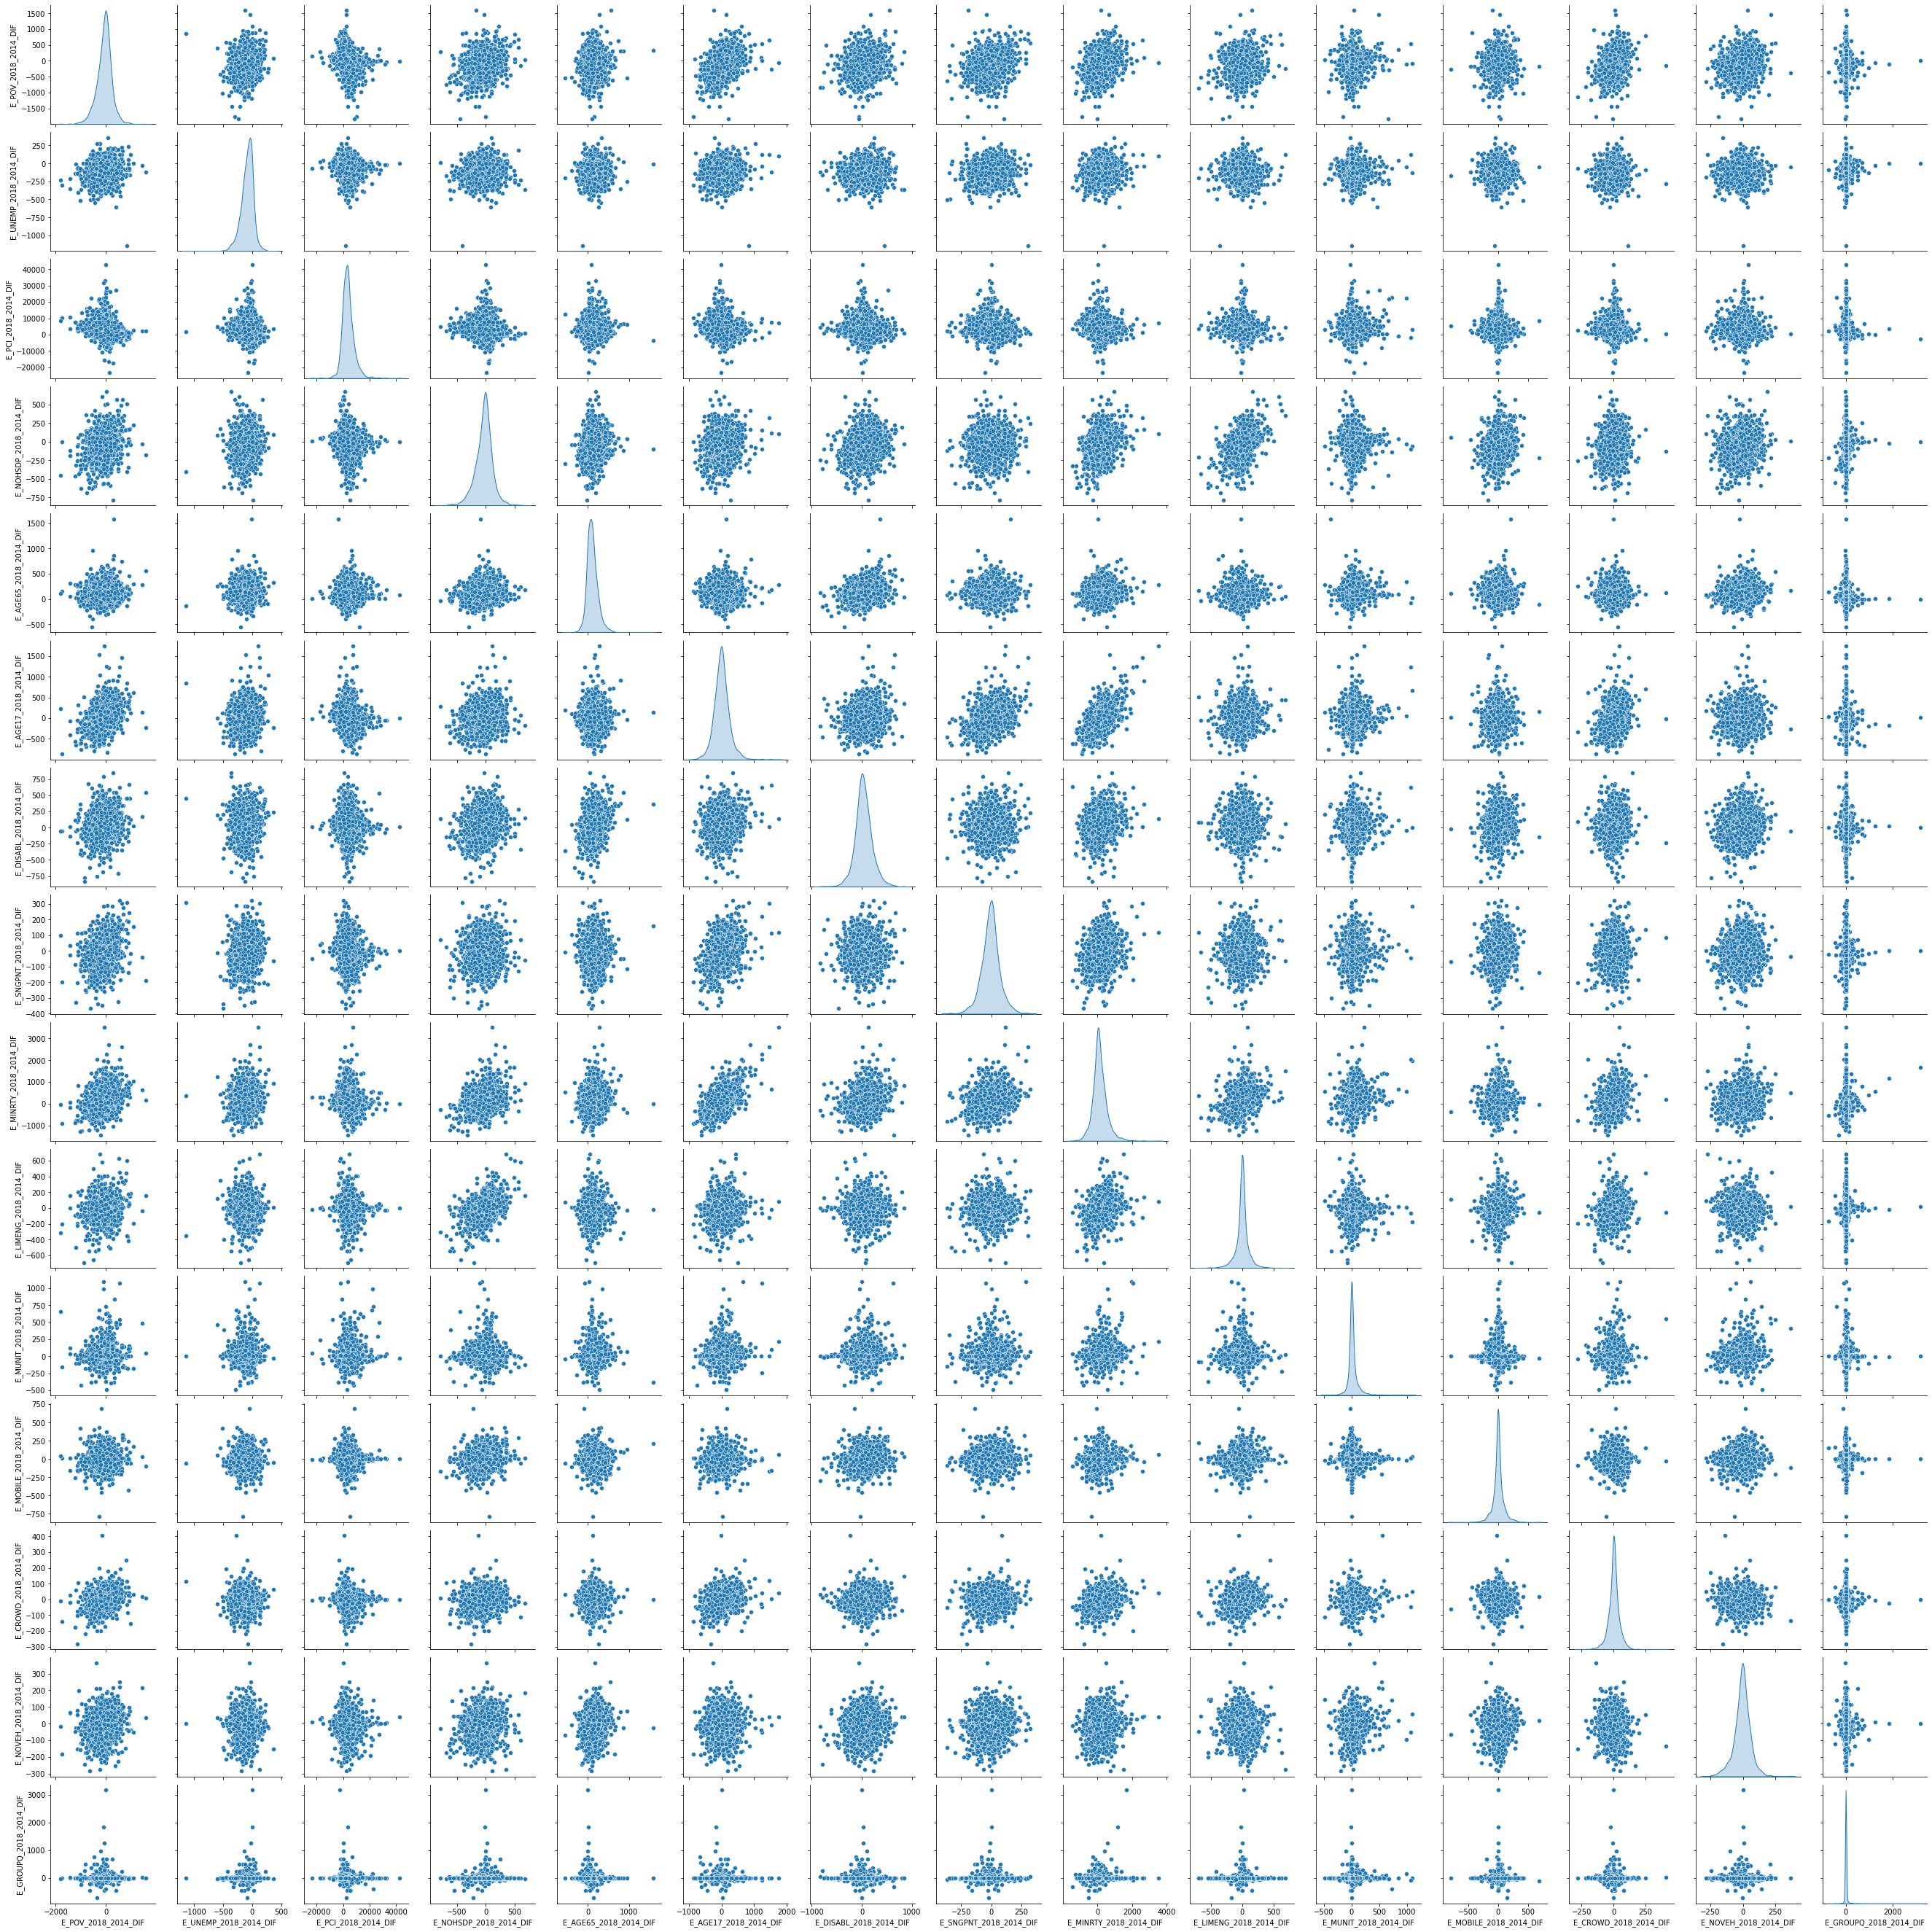

In [257]:
sns.pairplot(dataset_by_var, diag_kind='kde')

### PCA by variables

In [258]:
pca = PCA(dataset_by_var, standardize=True, method='eig' )
sum_var = pd.DataFrame( data=pca.rsquare.values, columns=[ 'cumulative_var' ] )
print( sum_var )

    cumulative_var
0         0.000000
1         0.186982
2         0.283204
3         0.371523
4         0.447067
5         0.517161
6         0.584472
7         0.649937
8         0.708572
9         0.765503
10        0.818490
11        0.864321
12        0.906483
13        0.945101
14        0.978274
15        1.000000


In [259]:
eigen_values = pd.DataFrame( data=pca.eigenvals.values, columns=[ 'eigenvalue' ] )
print( eigen_values )

     eigenvalue
0   6117.119135
1   3147.915555
2   2889.338674
3   2471.431177
4   2293.132857
5   2202.074398
6   2141.692141
7   1918.242297
8   1862.488466
9   1733.460412
10  1499.356930
11  1379.328496
12  1263.406819
13  1085.239023
14   710.773620


<function matplotlib.pyplot.show(close=None, block=None)>

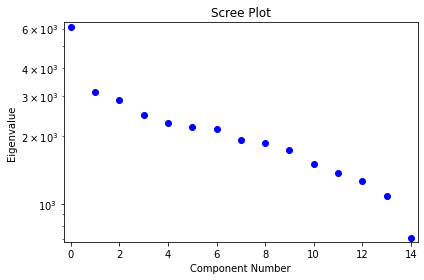

In [260]:
pca.plot_scree()
plt.show 

In [261]:
pca_df = pd.DataFrame(pca.loadings[ pca.loadings.columns])

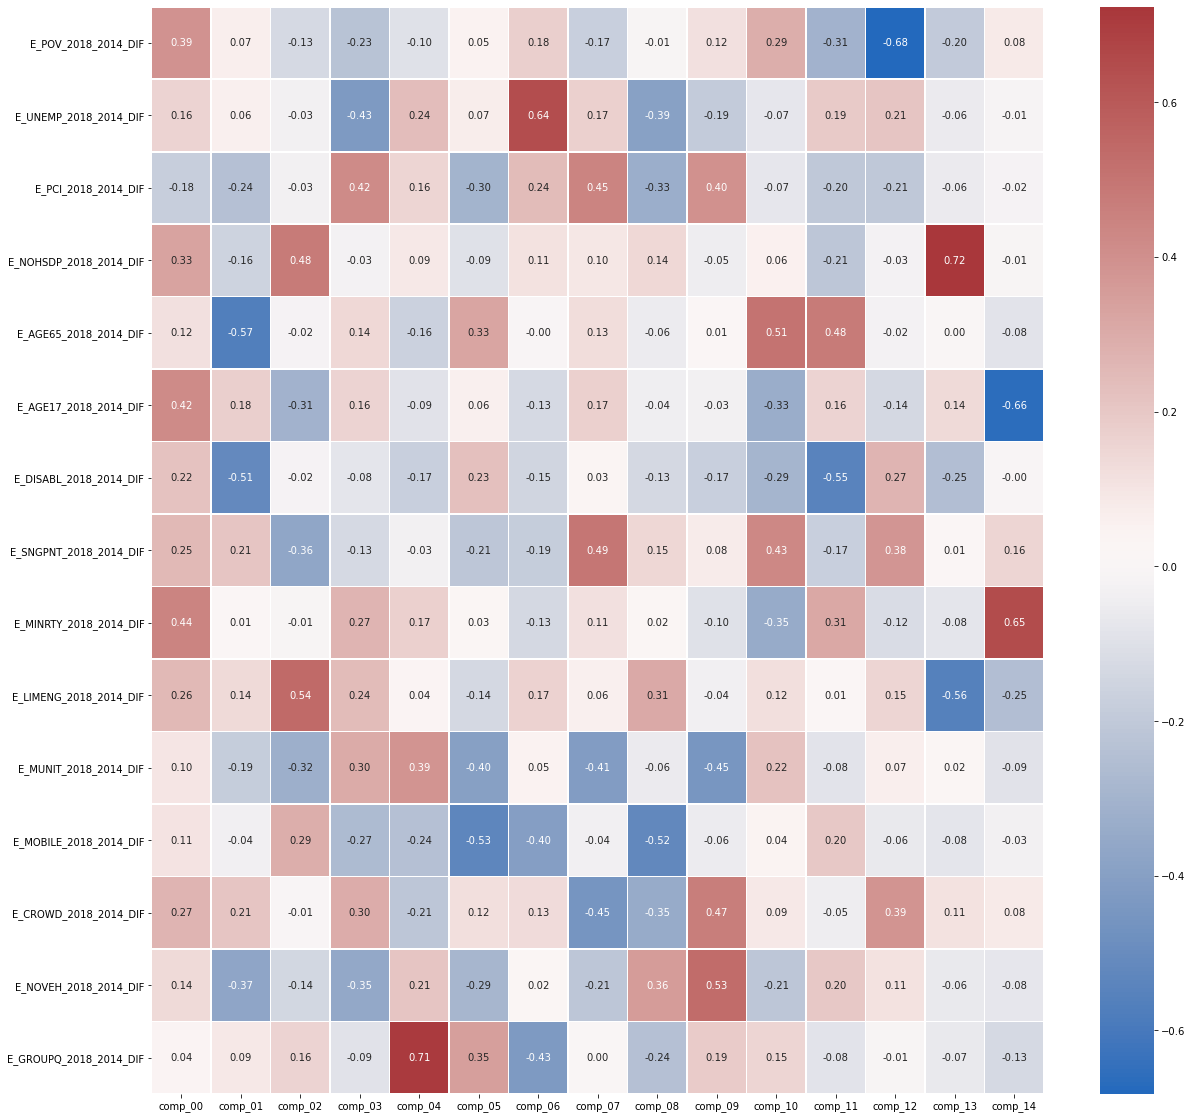

In [262]:
plt.subplots( figsize=(20,20) )
sns.heatmap(pca_df, cmap='vlag', linewidths=0.7,
      annot=True, fmt='.2f', yticklabels=pca_df.index )
plt.show()

### PCA by components

In [263]:
df_themes_new = df_themes_change.loc[:, ~df_themes_change.columns.str.contains('RPL_THEMES')]
pca = PCA(df_themes_new , standardize=True, method='eig' )
sum_var = pd.DataFrame( data=pca.rsquare.values, columns=[ 'cumulative_var' ] )
print( sum_var )

   cumulative_var
0        0.000000
1        0.337338
2        0.593806
3        0.813776
4        1.000000


In [264]:
eigen_values = pd.DataFrame( data=pca.eigenvals.values, columns=[ 'eigenvalue' ] )
print( eigen_values )

    eigenvalue
0  2942.940890
1  2237.425125
2  1919.015128
3  1624.618857


<function matplotlib.pyplot.show(close=None, block=None)>

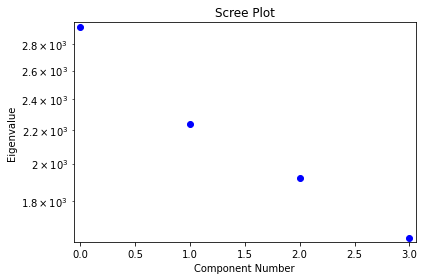

In [265]:
pca.plot_scree()
plt.show 

In [266]:
pca_df = pd.DataFrame(pca.loadings[ pca.loadings.columns])

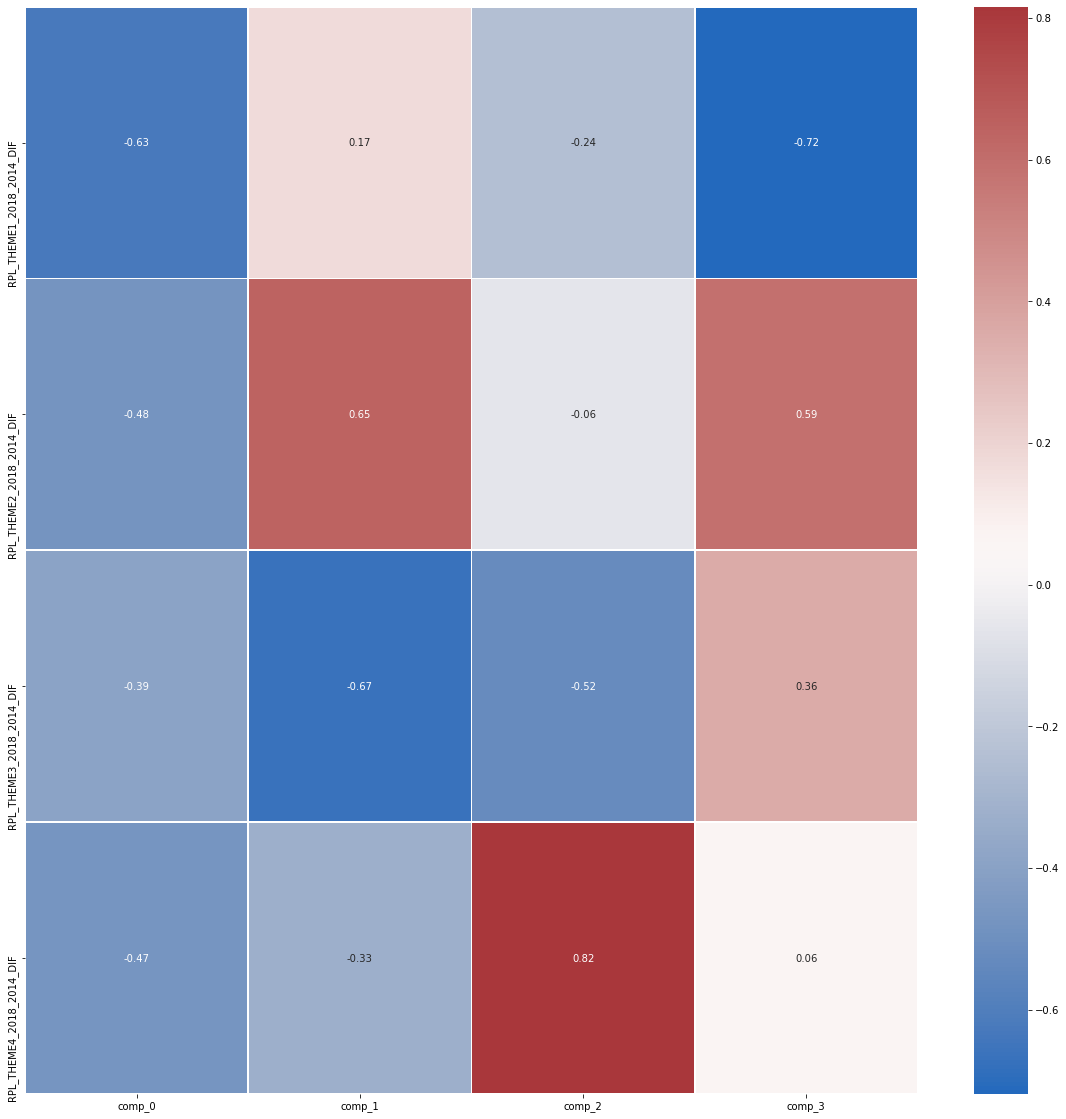

In [268]:
plt.subplots( figsize=(20,20) )
sns.heatmap(pca_df, cmap='vlag', linewidths=0.7,
      annot=True, fmt='.2f', yticklabels=pca_df.index )
plt.show()